In [1]:
import math

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 1000)

import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.rcParams.update({'xtick.labelsize': 6})
plt.rcParams.update({'ytick.labelsize': 6})
plt.rcParams.update({'axes.titlesize': 9})
plt.rcParams.update({'axes.spines.top': False})
plt.rcParams.update({'axes.spines.right': False})
plt.rcParams.update({'axes.xmargin': 0.01})
plt.rcParams.update({'legend.fontsize': 7})
plt.rcParams.update({'figure.titlesize': 10})

from tqdm import tqdm

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

ROLLING_WINDOW_SIZE = 100

from overall_results import *

Enriching dataframe.
Enrichment finished after 0.09861588478088379 ms


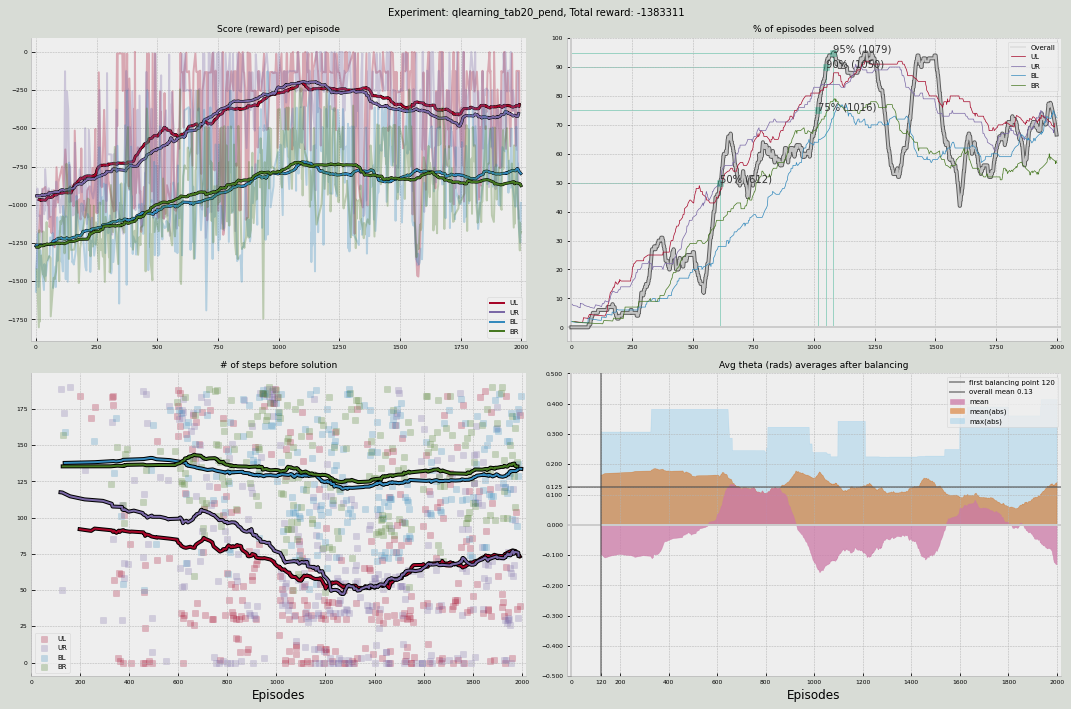

In [2]:

df = pd.read_csv('./csvs/qlearning_tab20_pend.csv', index_col=None)

plot(df)

In [5]:
enriched_df, episode_stats_df = process_df(df)

Enriching dataframe.
Enrichment finished after 0.1970841884613037 ms


In [28]:
enriched_df.head(10)

,Unnamed: 0,episode,step,state_0,state_1,state_2,action_0,reward,next_state_0,next_state_1,next_state_2,done,experiment_id,state_th,theta_label
0,0,0,0,-0.919843,-0.392286,-0.926939,-2.000000,-7.589179,-0.946992,-0.321258,-1.521154,0,qlearning_tab20_pend,-2.738477,BL
1,1,0,1,-0.946992,-0.321258,-1.521154,-1.555556,-8.155418,-0.974281,-0.225334,-1.995431,0,qlearning_tab20_pend,-2.814535,BL
2,2,0,2,-0.974281,-0.225334,-1.995431,-2.000000,-8.895357,-0.994590,-0.103877,-2.464432,0,qlearning_tab20_pend,-2.914306,BL
3,3,0,3,-0.994590,-0.103877,-2.464432,-2.000000,-9.837919,-0.999276,0.038043,-2.842339,0,qlearning_tab20_pend,-3.037528,BL
4,4,0,4,-0.999276,0.038043,-2.842339,-2.000000,-10.443852,-0.981291,0.192533,-3.113807,0,qlearning_tab20_pend,3.103540,BR
5,5,0,5,-0.981291,0.192533,-3.113807,-1.555556,-9.661818,-0.938035,0.346540,-3.202740,0,qlearning_tab20_pend,2.947850,BR
6,6,0,6,-0.938035,0.346540,-3.202740,-2.000000,-8.801098,-0.869789,0.493424,-3.242836,0,qlearning_tab20_pend,2.787713,BR
7,7,0,7,-0.869789,0.493424,-3.242836,-2.000000,-7.949222,-0.780919,0.624632,-3.172768,0,qlearning_tab20_pend,2.625571,BR
8,8,0,8,-0.780919,0.624632,-3.172768,-1.555556,-7.094823,-0.681093,0.732196,-2.937627,0,qlearning_tab20_pend,2.466933,BR
9,9,0,9,-0.681093,0.732196,-2.937627,-2.000000,-6.249604,-0.576821,0.816871,-2.688480,0,qlearning_tab20_pend,2.320051,BR


In [8]:
episode_stats_df.head(10)

,episode,reward,theta_0,theta_0_label,balance_step,solved
0,0,-1568.444277,-2.738477,BL,-1,0
1,1,-1420.719708,-2.661432,BL,-1,0
2,2,-1413.150868,-2.414731,BL,-1,0
3,3,-1413.441191,1.248658,UR,-1,0
4,4,-1423.648760,2.245235,BR,-1,0
5,5,-1342.818550,1.331925,UR,-1,0
6,6,-894.379174,0.579856,UR,-1,0
7,7,-1073.000978,1.304516,UR,-1,0
8,8,-1190.884724,-2.247525,BL,-1,0
9,9,-1186.658964,-1.936784,BL,-1,0


In [36]:
solutions = 100 * episode_stats_df['solved'].rolling(window=ROLLING_WINDOW_SIZE, center=True, min_periods=1).mean()
d = {
    'experiment_id':enriched_df['experiment_id'][0],
    'Episodes':len(episode_stats_df),
    'Total reward':episode_stats_df['reward'].sum(),
    'Reward per episode':episode_stats_df['reward'].mean(),
    '1st solution':episode_stats_df[episode_stats_df['solved']>0].index[0] if len(episode_stats_df[episode_stats_df['solved']>0])>0 else -1,
    '50% of episodes solved':np.where(solutions >= 50)[0][0] if len(np.where(solutions >= 50)[0])>0 else -1,
    '75% of episodes solved':np.where(solutions >= 75)[0][0] if len(np.where(solutions >= 75)[0])>0 else -1,
    '90% of episodes solved':np.where(solutions >= 90)[0][0] if len(np.where(solutions >= 90)[0])>0 else -1,
    '95% of episodes solved':np.where(solutions >= 95)[0][0] if len(np.where(solutions >= 95)[0])>0 else -1,
    '99% of episodes solved':np.where(solutions >= 99)[0][0] if len(np.where(solutions >= 99)[0])>0 else -1,
    '100% of episodes solved':np.where(solutions >= 100)[0][0] if len(np.where(solutions >= 100)[0])>0 else -1,
    
}
pd.DataFrame(d, index=[0]).head()

,experiment_id,Episodes,Total reward,Reward per episode,First solution,50% of episodes solved,75% of episodes solved,90% of episodes solved,95% of episodes solved,99% of episodes solved,100% of episodes solved
0,qlearning_tab20_pend,2000,-1.383311e+06,-691.655333,120,612,1016,1050,1079,-1,-1


In [19]:
episode_stats_df[episode_stats_df['solved']>0].index[0]

120

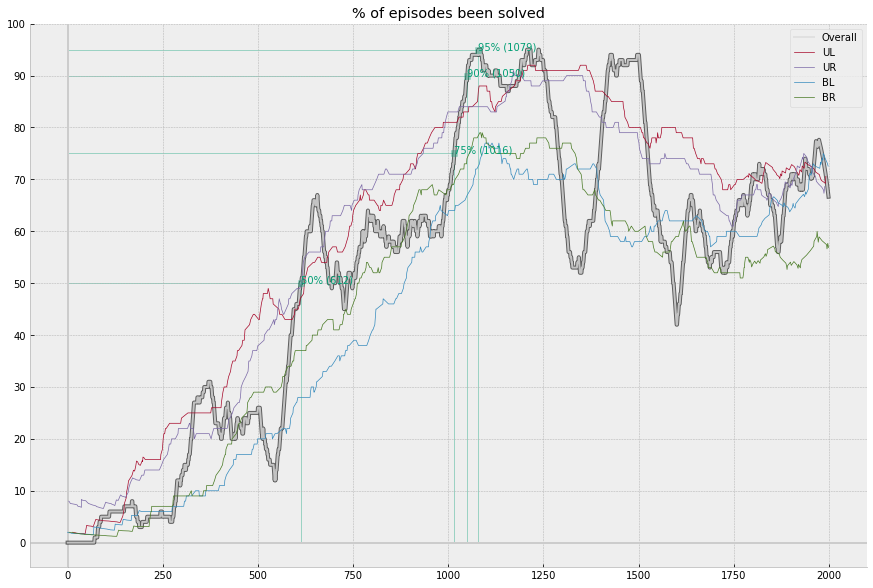

In [91]:
plt.figure(figsize=(15, 10))

plt.axhline(0, c='#cccccc')
plt.axvline(0, c='#cccccc')


solutions = 100 * episode_stats_df['solved'].rolling(window=ROLLING_WINDOW_SIZE, center=True, min_periods=1).mean()
plt.plot(solutions, c='black', alpha=0.6, linewidth=4, zorder=3)
plt.plot(solutions, c='#dddddd', alpha=0.8, linewidth=2, label='Overall', zorder=4)

for l, c in zip(['UL', 'UR', 'BL', 'BR'], ['C1', 'C2', 'C0', 'C3']):
    plt.plot(
        100 * episode_stats_df[episode_stats_df['theta_0_label'] == l]['solved'].rolling(window=100, center=True,
                                                                                         min_periods=1).mean(),
        linewidth=0.7, c=c, label=l, alpha=1, zorder=4)

ax = plt.gca()
xticks = list(np.linspace(0, len(solutions), 11))#list(ax.get_xticks())#list(range(0, len(solutions) + 1, 500))
for y in [50, 75, 90, 95, 99, 100]:
    episode_numbers = np.where(solutions >= y)[0]
    if len(episode_numbers) == 0:
        break
    x = episode_numbers[0]
    plt.plot([0, x], [y, y], alpha=0.35, c='C7', zorder=1, linewidth=1)
    plt.plot([x, x], [0, y], alpha=0.35, c='C7', zorder=1, linewidth=1)
    # plt.scatter(x, y, marker='o', c='black')
    plt.scatter(x, y, marker='s', c='C7', zorder=5, alpha=0.35)
    plt.annotate(f'{y}% ({x})', xy=(x, y), c='C7', zorder=5)
    xticks.append(x)
# plt.xticks(np.sort(xticks), rotation=-90)

plt.legend()
# plt.xlabel('Episodes')
# plt.ylabel('%')
plt.title('% of episodes been solved')
plt.yticks(range(0, 101, 10));
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

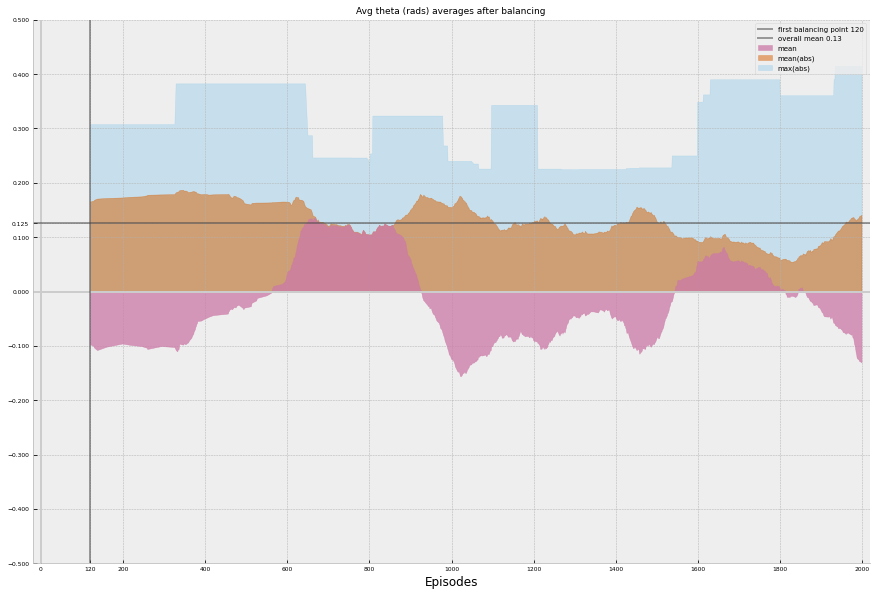

In [141]:
plt.figure(figsize=(15, 10))

plt.axhline(0, c='#cccccc')
plt.axvline(0, c='#cccccc')

temp_df = df.merge(episode_stats_df[['episode', 'balance_step']], on='episode')
temp_df = temp_df[temp_df['balance_step'] > -1]
min_ep, max_ep = temp_df['episode'].min(), temp_df['episode'].max()
# temp_df['after_balancing'] = temp_df['balance_step']>=temp_df['step']
temp_df = temp_df[temp_df['balance_step'] <= temp_df['step']]
temp_df = temp_df.groupby('episode').agg({'state_th': 'mean'})

first_balancing_point = temp_df.index.values.min()
plt.axvline(first_balancing_point, alpha=0.5, color='#444444', label=f'first balancing point {first_balancing_point:.00f}')


mean = temp_df['state_th'].rolling(window=ROLLING_WINDOW_SIZE, center=True, min_periods=1).mean()
x = mean.index.values.tolist()
y1 = np.zeros(mean.shape)

plt.fill_between(x=x, y1=y1, y2=mean, color='C5', alpha=0.75, label='mean', zorder=2)

mean_abs = temp_df['state_th'].abs().rolling(window=ROLLING_WINDOW_SIZE, center=True, min_periods=1).mean()
plt.fill_between(x=x, y1=y1, y2=mean_abs, color='C4', alpha=0.5, label='mean(abs)', zorder=1)
# plt.plot(mean_abs, color='C4', alpha=0.5, label='mean(abs)', zorder=1)

overall_mean = mean_abs.mean()
plt.axhline(overall_mean, alpha=0.5, color='#444444', label=f'overall mean {overall_mean:.02f}')


max_abs = temp_df['state_th'].abs().rolling(window=ROLLING_WINDOW_SIZE, center=True, min_periods=1).max()
plt.fill_between(x=x, y1=y1, y2=max_abs, color='C6', alpha=0.25, label='max(abs)', zorder=0)


plt.title('Avg theta (rads) averages after balancing')
plt.xlabel('Episodes')
# plt.ylabel('Theta (rads)')
y_ticks = np.append(np.linspace(-.5, .5, 11), overall_mean)
plt.yticks(y_ticks)
plt.xticks(np.append(np.linspace(0, df['episode'].max()+1, 11), first_balancing_point))
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

UR    520
BL    501
UL    494
BR    485
Name: theta_0_label, dtype: int64
0 200
100 200
200 200
300 200
400 200
500 200
600 200
700 200
800 200
900 200
1000 200
1100 200
1200 200
1300 200
1400 200
1500 200
1600 200
1700 200
1800 200
{'UR': [26.5, 25.5, 24.0, 24.0, 26.0, 27.0, 23.5, 18.5, 24.0, 26.0, 24.0, 31.0, 32.0, 27.0, 26.0, 26.0, 25.0, 27.5, 29.0], 'BR': [23.5, 24.5, 27.5, 26.5, 23.0, 22.0, 27.5, 30.5, 25.5, 26.5, 23.5, 17.5, 21.0, 23.5, 21.0, 23.0, 27.5, 24.5, 22.5], 'UL': [24.0, 26.0, 22.0, 21.5, 27.0, 26.5, 26.5, 29.5, 25.5, 23.5, 27.0, 23.5, 19.5, 21.5, 25.5, 28.0, 28.0, 26.0, 22.0], 'BL': [26.0, 24.0, 26.5, 28.0, 24.0, 24.5, 22.5, 21.5, 25.0, 24.0, 25.5, 28.0, 27.5, 28.0, 27.5, 23.0, 19.5, 22.0, 26.5]}


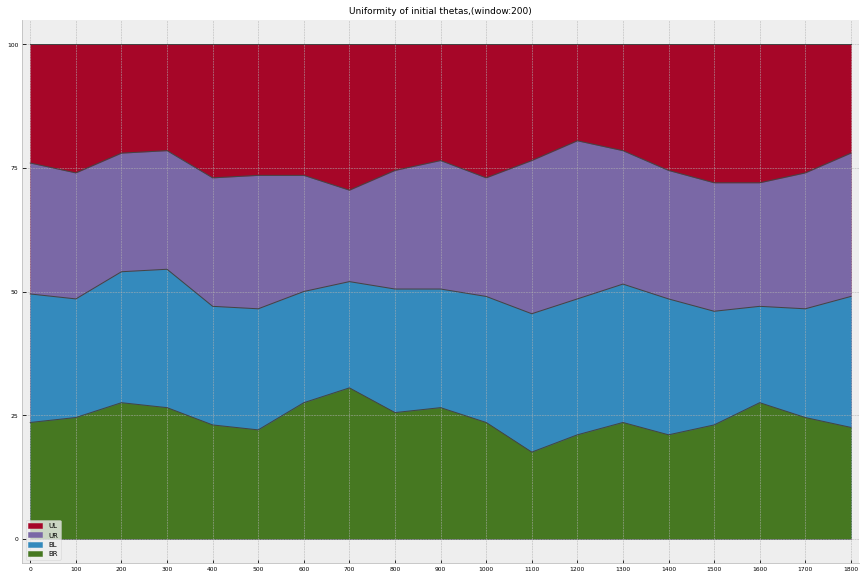

In [161]:
def state_uniformity(episode_stats_df):
    WINDOW_SIZE = len(episode_stats_df) // 10
    STEP = WINDOW_SIZE // 2
    res = {
        'UR': [],
        'BR': [],
        'UL': [],
        'BL': [],
    }
    x = list(range(0, len(episode_stats_df)-WINDOW_SIZE+1, STEP))
    for step in x:
        temp_df = episode_stats_df[(episode_stats_df['episode'] >= step) & (episode_stats_df['episode'] < step+WINDOW_SIZE)]
        hist = temp_df['theta_0_label'].value_counts().to_dict()
        for k, v in hist.items():
            res[k].append(100*v/WINDOW_SIZE)
    
    sum_line = 100*np.ones(len(res['UR']))
    y2 = np.zeros(len(res['UR']))
    for l, c in zip(['UL', 'UR', 'BL', 'BR'], ['C1', 'C2', 'C0', 'C3']):
        plt.fill_between(x=x, y1=sum_line, y2=y2, color=c, label=l)
        plt.plot(x, sum_line, color='#444444', linewidth=1)
        sum_line -= res[l]
        
    plt.yticks([0, 25, 50, 75, 100])
    plt.xticks(range(0, max(x)+1, STEP))
    plt.legend()
    plt.title(f'Uniformity of initial thetas,(window:{WINDOW_SIZE})')
    

plt.figure(figsize=(15, 10))
state_uniformity(episode_stats_df)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
